# Problem Set 3

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Constants
h = 0.72
H0 = 100 * h * 1.022e-3 # 1/Gyr

In [3]:
# Friedmann equation
def friedmann(t, a, Omega_k, Omega_m, Omega_r, Omega_DE, w):
    H_a = a * H0 * np.sqrt(Omega_k * a**(-2) + Omega_m * a**(-3) + Omega_r * a**(-4) + Omega_DE * a**(-3 * (1 + w)))
    return H_a

In [4]:
# Analytical solutions to Friedmann equation
def analytical(t, args, comp_name, theta=0):
    Omega_k = args[0]
    Omega_m = args[1]
    Omega_r = args[2]
    Omega_DE = args[3]
    if comp_name == 'Matter':
        a = ( (3/2) * np.sqrt(Omega_m) * H0 * t )**(2/3)
        return a
    if comp_name == 'Radiation':
        a = np.sqrt( 2 * np.sqrt(Omega_r) * H0 * t )
        return a
    if comp_name == 'Dark Energy':
        a = np.exp( np.sqrt(Omega_DE) * H0 * t)
        return a
    if comp_name == 'Curvature':
        a = H0 * np.sqrt(Omega_k) * t
        return a
    if comp_name == 'Matter+Curvature':
        if isinstance(theta, int):
            a = ( Omega_m / (- 2 * Omega_k) ) * ( 1 - np.cos(1e-3) )
        else:
            a_temp = np.zeros(len(theta))
            t_temp = np.zeros(len(theta))
            for i in range(len(theta)):
                a_temp[i] = ( Omega_m / (- 2 * Omega_k) ) * ( 1 - np.cos(theta[i]) )
                t_temp[i] = ( Omega_m / ( 2 * H0 * (-Omega_k)**(3/2) ) ) * ( theta[i] - np.sin(theta[i]) )
            a = np.interp(t, t_temp, a_temp)
        return a
    if comp_name == 'Matter+Dark Energy':
        a = ( Omega_m / Omega_DE )**(1/3) * ( np.sinh( 3 * np.sqrt(Omega_DE) * H0 * t / 2 ) )**(2/3)
        return a

## a)

In [5]:
# Components
single_components = {
    'Curvature': {'Omega_k': 1, 'Omega_m': 0, 'Omega_r': 0, 'Omega_DE': 0, 'w': 0},
    'Matter': {'Omega_k': 0, 'Omega_m': 1, 'Omega_r': 0, 'Omega_DE': 0, 'w': 0},
    'Radiation': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 1, 'Omega_DE': 0, 'w': 0},
    'Dark Energy': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 0, 'Omega_DE': 1, 'w': -1},
}

In [6]:
# Initial conditions
t_span = (0.1,15) # Gyr
t_eval = np.linspace(0.1, 15, 1000)

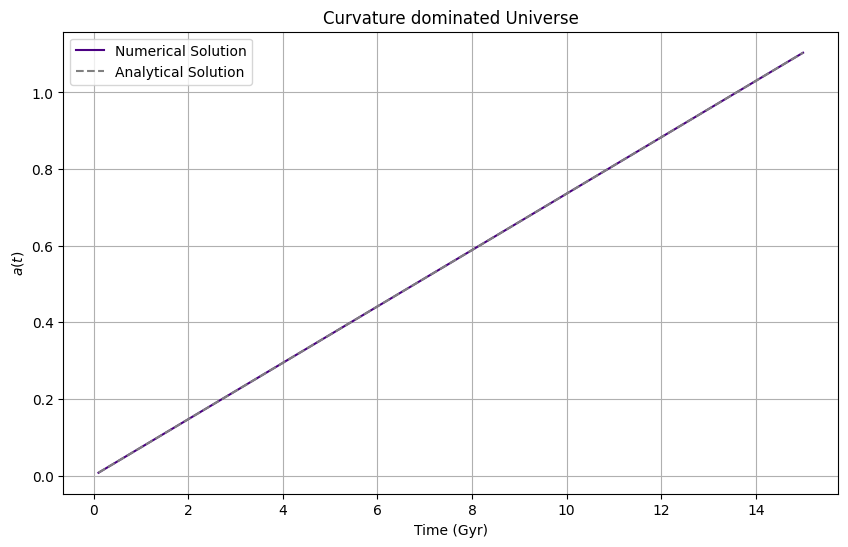

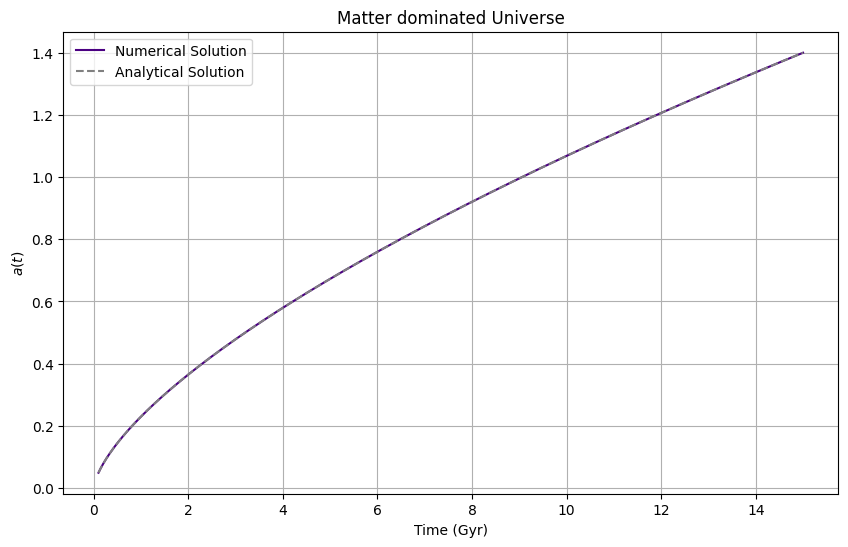

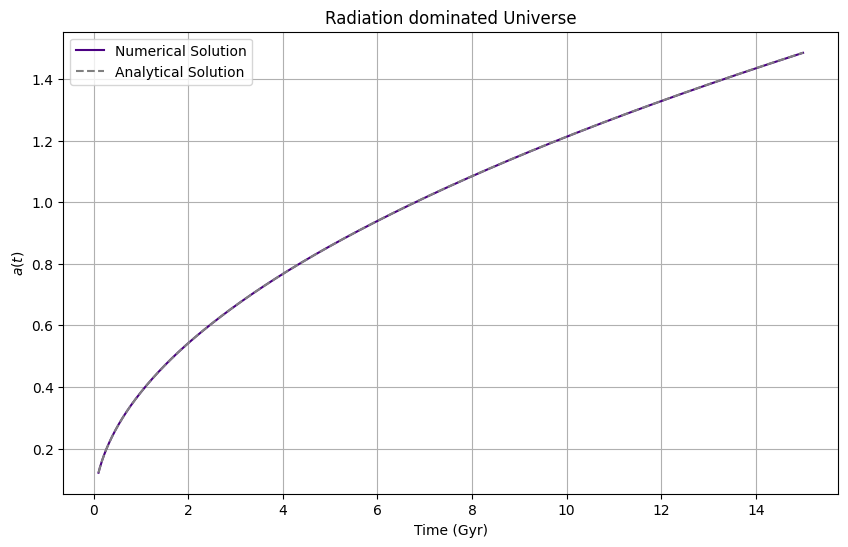

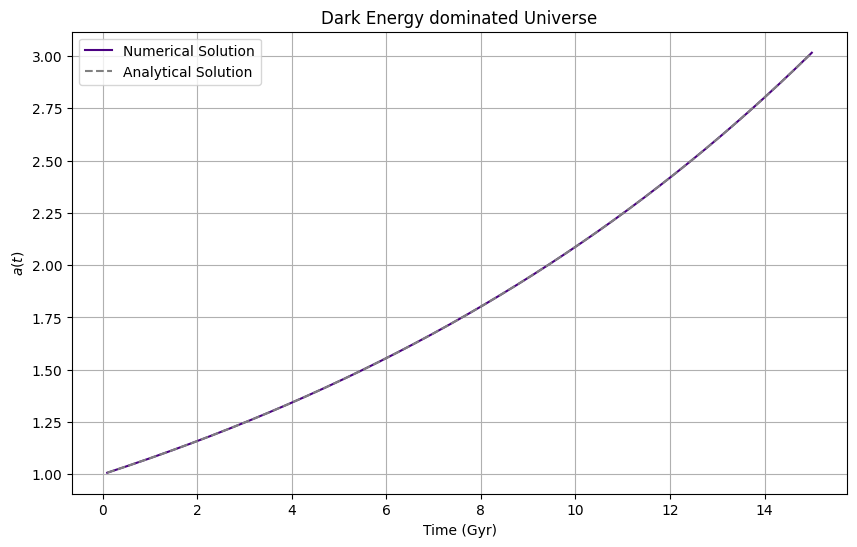

In [7]:
# Solutions and plots
for comp_name, params in single_components.items():
    a0 = [analytical(t_eval[0], args=tuple(params.values()), comp_name=comp_name)]
    sol = solve_ivp(friedmann, t_span, a0, args=tuple(params.values()), dense_output=True, t_eval=t_eval)
    a = analytical(t_eval, args=tuple(params.values()), comp_name=comp_name)

    plt.figure(figsize=(10,6))
    plt.plot(sol.t, sol.y[0], c='indigo', label='Numerical Solution')
    plt.plot(t_eval, a, c='grey', ls='--', label='Analytical Solution')
    plt.xlabel('Time (Gyr)')
    plt.ylabel(r'$a(t)$')
    plt.title(f'{comp_name} dominated Universe')
    plt.grid(True)
    plt.legend()

    plt.savefig(f'{comp_name}.png', dpi=240)

    plt.show()

## b)

In [8]:
# Components
two_components = {
    'Matter+Curvature': {'Omega_k': -0.5, 'Omega_m': 1.3, 'Omega_r': 0, 'Omega_DE': 0, 'w': 0},
    'Matter+Dark Energy': {'Omega_k': 0, 'Omega_m': 1.3, 'Omega_r': 0, 'Omega_DE': 1.3, 'w': -1},
}

In [9]:
# Initial conditions
t_span = (0.1,15) # Gyr
t_eval = np.linspace(0.1, 15, 1000)
theta_eval = np.linspace(0.1, 2*np.pi, 1000)

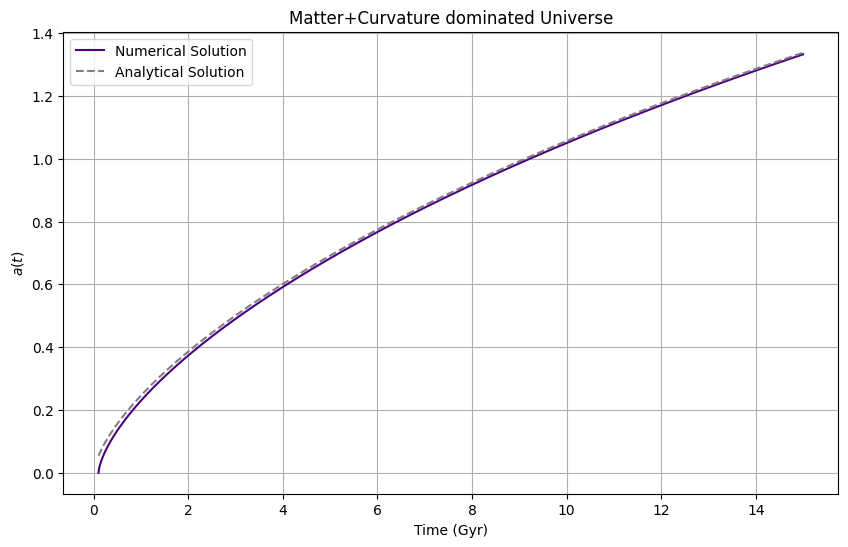

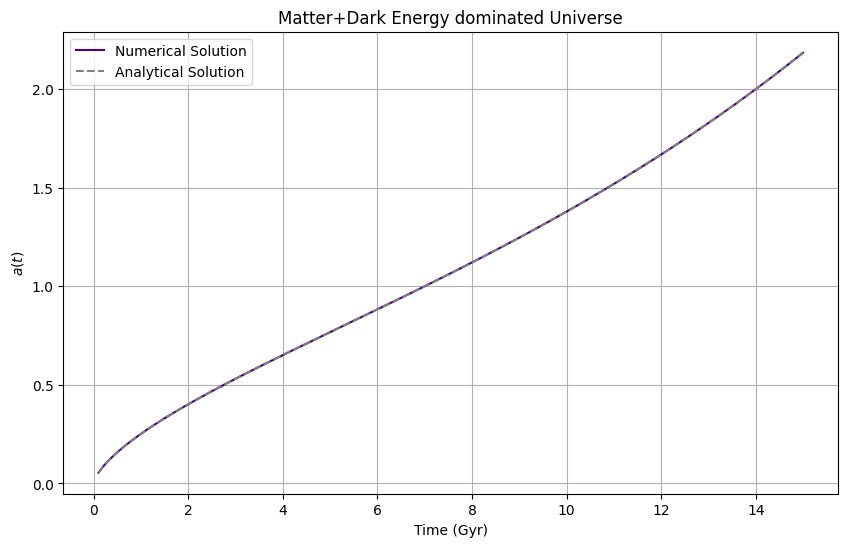

In [10]:
# Solutions and plots
for comp_name, params in two_components.items():
    a0 = [analytical(t_eval[0], args=tuple(params.values()), comp_name=comp_name)]
    sol = solve_ivp(friedmann, t_span, a0, args=tuple(params.values()), dense_output=True, t_eval=t_eval)
    a = analytical(t_eval, args=tuple(params.values()), comp_name=comp_name, theta=theta_eval)

    plt.figure(figsize=(10,6))
    plt.plot(sol.t, sol.y[0], c='indigo', label='Numerical Solution')
    plt.plot(t_eval, a, c='grey', ls='--', label='Analytical Solution')
    plt.xlabel('Time (Gyr)')
    plt.ylabel(r'$a(t)$')
    plt.title(f'{comp_name} dominated Universe')
    plt.grid(True)
    plt.legend()

    plt.savefig(f'{comp_name}.png', dpi=240)

    plt.show()

## c)

In [11]:
def find_age(a, t, precision=0.001):
    age = t[np.isclose(a, 1, atol=precision)]
    return age

In [12]:
# Components
c_components = {
    'All': {'Omega_k': 0, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_m = 0.10': {'Omega_k': 1, 'Omega_m': 0.1, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_m = 0.25': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_m = 0.50': {'Omega_k': 1, 'Omega_m': 0.5, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_m = 1.00': {'Omega_k': 1, 'Omega_m': 1, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_DE = 0.50': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.5, 'w': -1},
    'Fixed Omega_DE = 0.75': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Fixed Omega_DE = 1.00': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1, 'w': -1},
    'Fixed w = -0.80': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -0.8},
    'Fixed w = -1.00': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed w = -1.20': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 1.3, 'w': -1.2},
    'Fixed Omega_r = 6e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 6e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_r = 8e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 8e-5, 'Omega_DE': 1.3, 'w': -1},
    'Fixed Omega_r = 10e-5': {'Omega_k': 1, 'Omega_m': 0.25, 'Omega_r': 10e-5, 'Omega_DE': 1.3, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.00, 1.00)': {'Omega_k': 0, 'Omega_m': 0, 'Omega_r': 8.2e-5, 'Omega_DE': 1, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.10, 0.90)': {'Omega_k': 0, 'Omega_m': 0.1, 'Omega_r': 8.2e-5, 'Omega_DE': 0.9, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.25, 0.75)': {'Omega_k': 0, 'Omega_m': 0.25, 'Omega_r': 8.2e-5, 'Omega_DE': 0.75, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (0.75, 0.25)': {'Omega_k': 0, 'Omega_m': 0.75, 'Omega_r': 8.2e-5, 'Omega_DE': 0.25, 'w': -1},
    'Flat Universe (Omega_m, Omega_DE) = (1.00, 0.00)': {'Omega_k': 0, 'Omega_m': 1, 'Omega_r': 8.2e-5, 'Omega_DE': 0, 'w': -1},
}

for comp_name, params in c_components.items():
    if 'Fixed' in comp_name:
        c_components[comp_name]['Omega_k'] -= c_components[comp_name]['Omega_m'] + c_components[comp_name]['Omega_r'] + c_components[comp_name]['Omega_DE']

/tmp/ipykernel_4952/2922393357.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c='indigo')


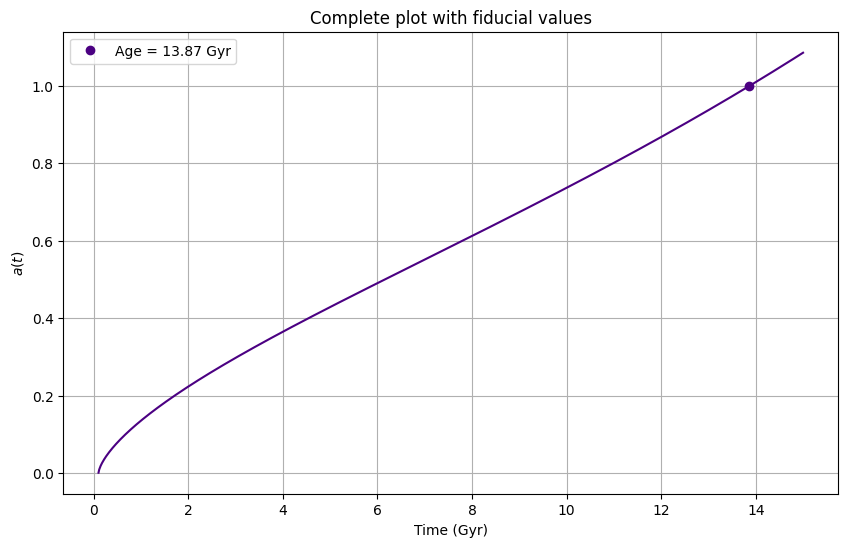

In [13]:
# Initial conditions
t_span = (0.1, 15) # Gyr
t_eval = np.linspace(0.1, 15, 1000)

# Solutions and plots for complete fiducial values
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    sol = solve_ivp(friedmann, t_span, [1e-3], args=tuple(params.values()), dense_output=True, t_eval=t_eval)
    age = find_age(sol.y[0], t_eval)
    
    if 'All' in comp_name:
        plt.plot(sol.t, sol.y[0], c='indigo')
        plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c='indigo')
        plt.title('Complete plot with fiducial values')
        plt.xlabel('Time (Gyr)')
        plt.ylabel(r'$a(t)$')
        plt.grid(True)
        plt.legend()

        plt.savefig('all.png', dpi=240)

        plt.show()

/tmp/ipykernel_4952/1532471084.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
/tmp/ipykernel_4952/1532471084.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)


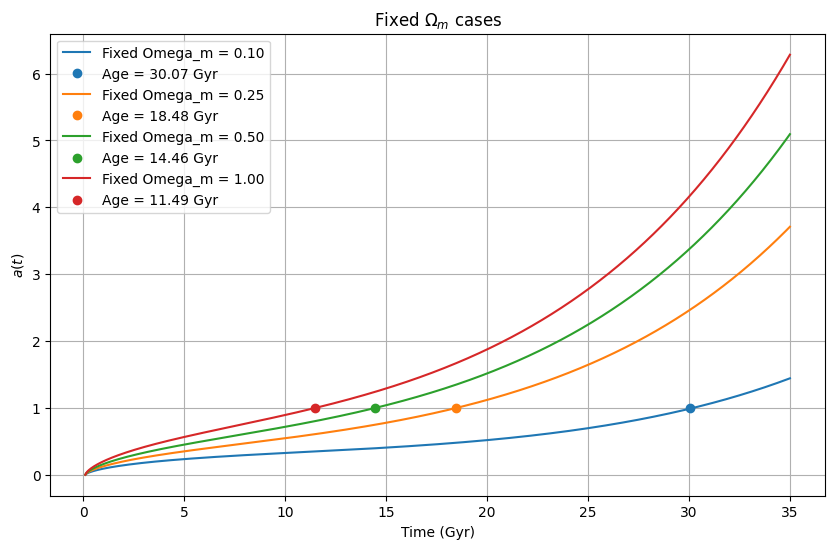

In [14]:
# Initial conditions
t_span = (0.1, 35) # Gyr
t_eval = np.linspace(0.1, 35, 1000)

# Solutions and plots for fixed Omega_m
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    sol = solve_ivp(friedmann, t_span, [1e-3], args=tuple(params.values()), dense_output=True, t_eval=t_eval)

    if 'Fixed Omega_m' in comp_name:
        line, = plt.plot(sol.t, sol.y[0], label=f'{comp_name}')
        line_color = line.get_color()
        if 'Fixed Omega_m = 0.10' in comp_name:
            age = find_age(sol.y[0], t_eval, precision=0.01)
            plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
        else:
            age = find_age(sol.y[0], t_eval)
            plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
plt.title(r'Fixed $\Omega_m$ cases')
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$a(t)$')
plt.grid(True)
plt.legend()

plt.savefig('Omega_m.png', dpi=240)

plt.show()

/tmp/ipykernel_4952/3716769392.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)


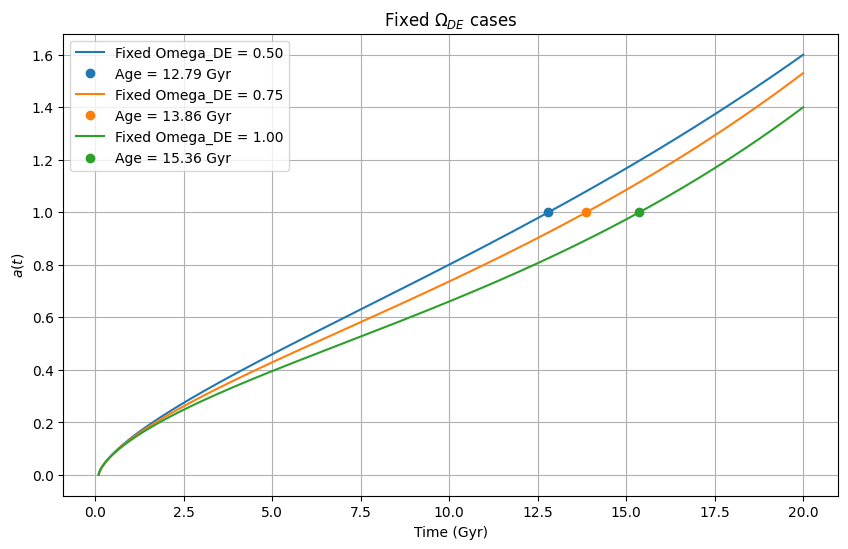

In [15]:
# Initial conditions
t_span = (0.1, 20) # Gyr
t_eval = np.linspace(0.1, 20, 1000)

# Solutions and plots for fixed Omega_DE
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    sol = solve_ivp(friedmann, t_span, [1e-3], args=tuple(params.values()), dense_output=True, t_eval=t_eval)

    if 'Fixed Omega_DE' in comp_name:
        age = find_age(sol.y[0], t_eval)
        line, = plt.plot(sol.t, sol.y[0], label=f'{comp_name}')
        line_color = line.get_color()
        plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
plt.title(r'Fixed $\Omega_{DE}$ cases')
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$a(t)$')
plt.grid(True)
plt.legend()

plt.savefig('Omega_DE.png', dpi=240)

plt.show()

/tmp/ipykernel_4952/2510490705.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)


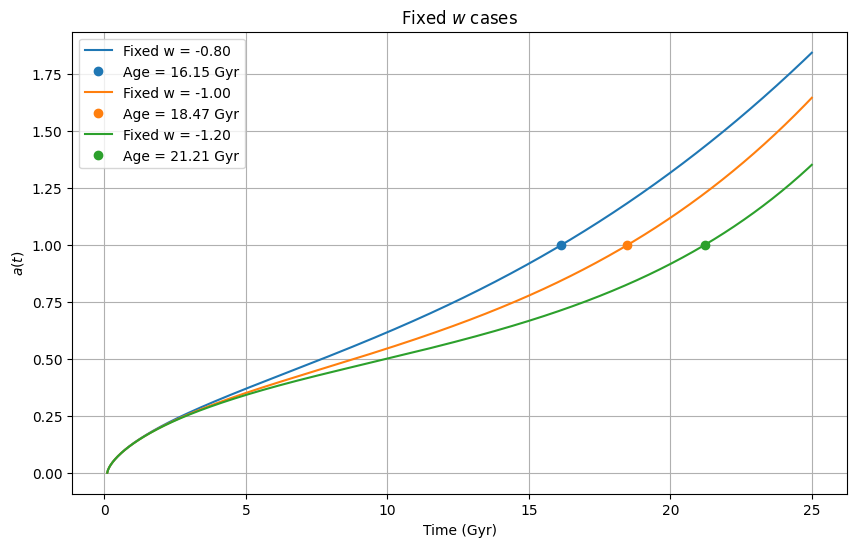

In [16]:
# Initial conditions
t_span = (0.1, 25) # Gyr
t_eval = np.linspace(0.1, 25, 1000)

# Solutions and plots for fixed w
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    sol = solve_ivp(friedmann, t_span, [1e-3], args=tuple(params.values()), dense_output=True, t_eval=t_eval)

    if 'Fixed w' in comp_name:
        age = find_age(sol.y[0], t_eval)
        line, = plt.plot(sol.t, sol.y[0], label=f'{comp_name}')
        line_color = line.get_color()
        plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
plt.title(r'Fixed $w$ cases')
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$a(t)$')
plt.grid(True)
plt.legend()

plt.savefig('w.png', dpi=240)

plt.show()

/tmp/ipykernel_4952/65688110.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)


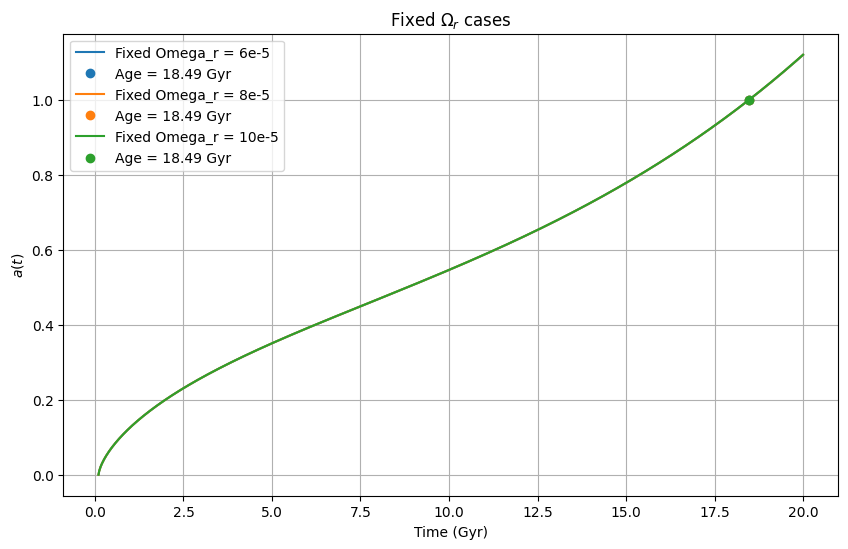

In [17]:
# Initial conditions
t_span = (0.1, 20) # Gyr
t_eval = np.linspace(0.1, 20, 1000)

# Solutions and plots for fixed Omega_r
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    sol = solve_ivp(friedmann, t_span, [1e-3], args=tuple(params.values()), dense_output=True, t_eval=t_eval)

    if 'Fixed Omega_r' in comp_name:
        age = find_age(sol.y[0], t_eval)
        line, = plt.plot(sol.t, sol.y[0], label=f'{comp_name}')
        line_color = line.get_color()
        plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
plt.title(r'Fixed $\Omega_r$ cases')
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$a(t)$')
plt.grid(True)
plt.legend()

plt.savefig('Omega_r.png', dpi=240)

plt.show()

/tmp/ipykernel_4952/3775652479.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)


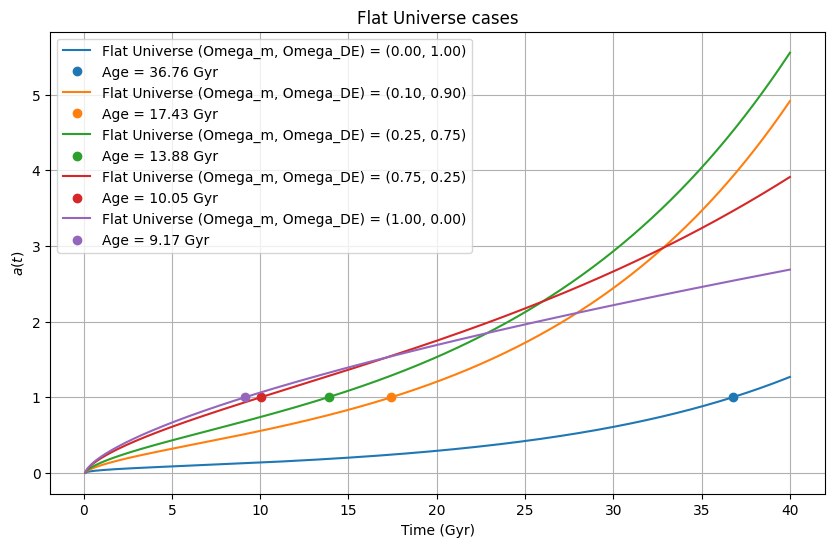

In [18]:
# Initial conditions
t_span = (0.1, 40) # Gyr
t_eval = np.linspace(0.1, 40, 1000)

# Solutions and plots for fixed Omega_r
plt.figure(figsize=(10,6))

for comp_name, params in c_components.items():
    sol = solve_ivp(friedmann, t_span, [1e-3], args=tuple(params.values()), dense_output=True, t_eval=t_eval)

    if 'Flat Universe' in comp_name:
        age = find_age(sol.y[0], t_eval)
        line, = plt.plot(sol.t, sol.y[0], label=f'{comp_name}')
        line_color = line.get_color()
        plt.plot(age[0], 1, 'ro', label=f'Age = {age[0]:.2f} Gyr', c=line_color)
plt.title(r'Flat Universe cases')
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$a(t)$')
plt.grid(True)
plt.legend()

plt.savefig('flat.png', dpi=240)

plt.show()